<a href="https://colab.research.google.com/github/Jerrylu99/econ5200-assignments/blob/main/Assignment2/econ_5200_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#manual DGP Simulation
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])



In [ ]:
def calculate_mad(data):
  median = np.median(data)
  deviation = np.abs(data-median)
  mad = np.median(deviation)
  return mad
print(calculate_mad(latency_logs))
print(np.std(latency_logs))








7.5
428.3597006150322


The standard deviation is highly sensitive to extreme outliers, which causes it to increase dramatically in the presence of latency spikes.
In contrast, the Median Absolute Deviation (MAD) relies on medians rather than means, making it robust
to extreme values and more stable in skewed distributions.


In [ ]:
def bayesian_audit(prior,sensitivity,specificity):
  posterior = (prior*sensitivity)/((prior*sensitivity)+((1-prior)*(1-specificity)))
  return posterior







In [ ]:
print('Scenar A:', bayesian_audit(0.5,0.98,0.98))
print('Scenar B:', bayesian_audit(0.05,0.98,0.98))
print('Scenar C:', bayesian_audit(0.001,0.98,0.98))

Scenar A: 0.98
Scenar B: 0.7205882352941175
Scenar C: 0.04675572519083965


Although the detector has high sensitivity and specificity, the posterior probability of cheating decreases sharply as the base rate declines. In low-prevalence settings such as an honors seminar, most flagged cases are false positives. This illustrates the false positive paradox and highlights why accuracy alone is a misleading metric.

In [ ]:

import numpy as np
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
# Control Users = 50,250 | Treatment Users = 49,750
observed = np.array([50250, 49750])
total = np.sum(observed)
expected = np.array([total/2,total/2])
# Write the calculation loop...
chi2 = 0
for i in range(len(observed)):
  chi2 += (observed[i]-expected[i])**2/expected[i]
print('observed:',observed)
print('expected:',expected)
print('chi2:',chi2)

if chi2 > 3.84:
  print("Sample Ratio Mismatch -> Experiment INVALID")
else:
  print('No significant SRM -> Experiment VALID')

observed: [50250 49750]
expected: [50000. 50000.]
chi2: 2.5
No significant SRM -> Experiment VALID


With N=100,000 and a 50/50 split, expected counts are 50,000 per group. The observed counts (50,250 vs 49,750) produce χ²=2.5, which is below the 0.05 critical value 3.84 (df=1). Therefore, we do not detect a statistically significant SRM and the experiment assignment appears valid.

Mean Peak Market Cap (ALL tokens): 1740842.11
Mean Peak Market Cap (SURVIVORS only): 28967643.47
Bias Multiplier: 16.6 x


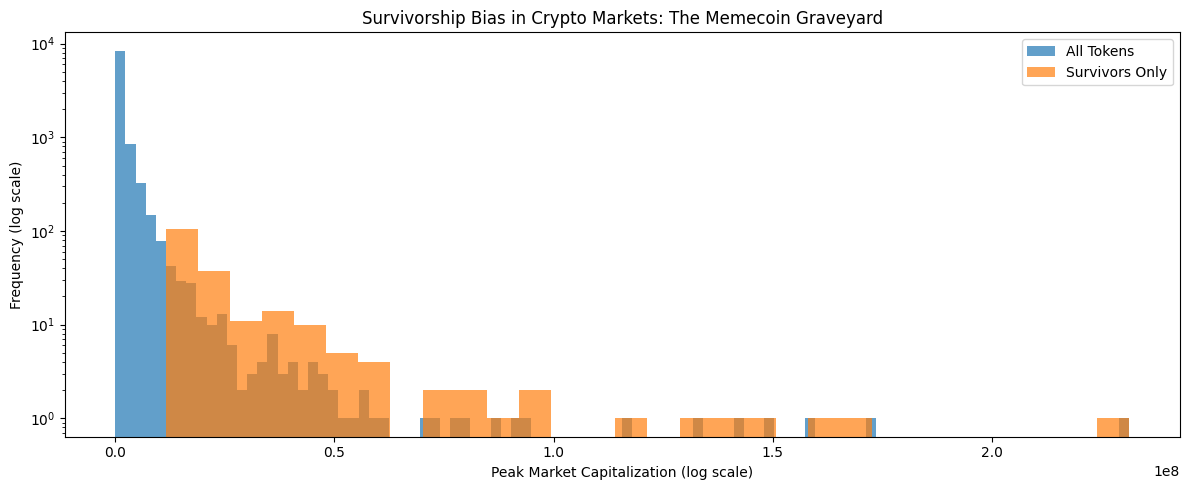

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. set random seed
np.random.seed(42)
# 2. simulate 10000 token launches
n_tokens = 10000
# Pareto distribution (power law)
# Heavy tail: a few huge winners, many near-zero failures
alpha = 1.5
raw_caps = np.random.pareto(alpha, n_tokens)
# Scale so most tokens are near zero
peak_market_caps = raw_caps * 1e6
# 3. Create full "graveyard" dataset

df_all = pd.DataFrame({
    "Token_ID": range(n_tokens),
    "Peak_Market_Cap": peak_market_caps
})
# 4. Survivors: Top 2% by market cap

cutoff = df_all["Peak_Market_Cap"].quantile(0.98)
df_survivors = df_all[df_all["Peak_Market_Cap"] >= cutoff]

# 5. Compute means (Survivorship Bias)

mean_all = df_all["Peak_Market_Cap"].mean()
mean_survivors = df_survivors["Peak_Market_Cap"].mean()

print("Mean Peak Market Cap (ALL tokens):", round(mean_all, 2))
print("Mean Peak Market Cap (SURVIVORS only):", round(mean_survivors, 2))
print("Bias Multiplier:", round(mean_survivors / mean_all, 1), "x")


# 6. Visualization

plt.figure(figsize=(12, 5))

# Histogram: All tokens
plt.hist(df_all["Peak_Market_Cap"],
         bins=100,
         alpha=0.7,
         label="All Tokens",
         log=True)

# Histogram: Survivors
plt.hist(df_survivors["Peak_Market_Cap"],
         bins=30,
         alpha=0.7,
         label="Survivors Only",
         log=True)

plt.xlabel("Peak Market Capitalization (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Survivorship Bias in Crypto Markets: The Memecoin Graveyard")
plt.legend()
plt.tight_layout()
plt.show()
